In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle competitions download -c galaxy-zoo-the-galaxy-challenge

 99% 1.76G/1.77G [00:12<00:00, 161MB/s]
100% 1.77G/1.77G [00:12<00:00, 149MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/galaxy-zoo-the-galaxy-challenge.zip','r')
zip_ref.extractall('/content/zipped')
zip_ref.close()

In [ ]:
zip_zero = zipfile.ZipFile('/content/zipped/all_zeros_benchmark.zip','r')
zip_zero.extractall('/content/unzipped')
zip_zero.close()

zip_one = zipfile.ZipFile('/content/zipped/all_ones_benchmark.zip','r')
zip_one.extractall('/content/unzipped')
zip_one.close()

zip_cen = zipfile.ZipFile('/content/zipped/central_pixel_benchmark.zip','r')
zip_cen.extractall('/content/unzipped')
zip_cen.close()

zip_test = zipfile.ZipFile('/content/zipped/images_test_rev1.zip','r')
zip_test.extractall('/content/unzipped')
zip_test.close()

zip_train = zipfile.ZipFile('/content/zipped/images_training_rev1.zip','r')
zip_train.extractall('/content/unzipped')
zip_train.close()

zip_sol = zipfile.ZipFile('/content/zipped/training_solutions_rev1.zip','r')
zip_sol.extractall('/content/unzipped')
zip_sol.close()

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
#%matplotlib inline
import pandas as pd
import os, random, shutil

from keras_preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
base_path = r'/content/unzipped'

In [ ]:
training_solutions = os.path.join(base_path, 'training_solutions_rev1.csv')
training_images    = os.path.join(base_path, 'images_training_rev1')

In [ ]:
df = pd.read_csv(training_solutions)

In [ ]:
cols = df.columns
new = list(map(lambda s: s.replace('Class','Q'), cols))
df.columns = new

In [ ]:
df.shape

(61578, 38)

In [ ]:
df.head()

,GalaxyID,Q1.1,Q1.2,Q1.3,Q2.1,Q2.2,Q3.1,Q3.2,Q4.1,Q4.2,...,Q9.3,Q10.1,Q10.2,Q10.3,Q11.1,Q11.2,Q11.3,Q11.4,Q11.5,Q11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
ellipticals = df[(df['Q1.1']>0.1) & (df['Q7.1']>0.69)]['GalaxyID'].tolist()

In [ ]:
lenticulars = df[(df['Q1.1']>0.1) & (df['Q7.2']>0.65)]['GalaxyID'].tolist()

In [ ]:
spirals = df[(df['Q1.2']>0.1) & (df['Q2.1']>0.65)]['GalaxyID'].tolist()

In [ ]:
irregular = df[(df['Q8.4']>0.2)]['GalaxyID'].tolist()

In [ ]:
print('Total number of elliptical examples: ',  len(ellipticals))
print('Total number of lenticular examples: ',  len(lenticulars))
print('Total number of spiral examples: ',  len(spirals))
print('Total number of irregular examples: ',  len(irregular))

Total number of elliptical examples:  3501
Total number of lenticular examples:  3316
Total number of spiral examples:  3371
Total number of irregular examples:  3005


In [ ]:
def _proc_images(src, dst, label, arr, percent):
    train_dir = os.path.join(dst, 'train')
    val_dir = os.path.join(dst, 'validation')

    train_dest = os.path.join(train_dir, label)
    val_dest   = os.path.join(val_dir, label)

    if not os.path.exists(train_dest):
        os.makedirs(train_dest)

    if not os.path.exists(val_dest):
        os.makedirs(val_dest)

    random.shuffle(arr)

    idx = int(len(arr)*percent)
    for i in arr[0:idx]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(train_dest, str(i)+'.jpg'))
    for i in arr[idx:]:
        shutil.copyfile(os.path.join(src, str(i)+'.jpg'), os.path.join(val_dest, str(i)+'.jpg'))

    print(label, 'done!')

In [ ]:
my_data = os.path.join(base_path, 'data')

In [ ]:
_proc_images(training_images, my_data, 'elliptical', ellipticals, 0.7)
_proc_images(training_images, my_data, 'lenticular', lenticulars, 0.7)
_proc_images(training_images, my_data, 'spiral', spirals, 0.7)
_proc_images(training_images, my_data, 'irregular', irregular, 0.7)

elliptical done!
lenticular done!
spiral done!
irregular done!


In [ ]:
print('Total train elliptical:', len(os.listdir(os.path.join(my_data, 'train', 'elliptical'))))
print('Total train lenticular:', len(os.listdir(os.path.join(my_data, 'train', 'lenticular'))))
print('Total train spiral:', len(os.listdir(os.path.join(my_data, 'train', 'spiral'))))
print('Total train irregular:', len(os.listdir(os.path.join(my_data, 'train', 'irregular'))))

Total train elliptical: 2450
Total train lenticular: 2321
Total train spiral: 2359
Total train irregular: 2103


In [ ]:
print('Total validation elliptical:', len(os.listdir(os.path.join(my_data, 'validation', 'elliptical'))))
print('Total validation lenticular:', len(os.listdir(os.path.join(my_data, 'validation', 'lenticular'))))
print('Total validation spiral:', len(os.listdir(os.path.join(my_data, 'validation', 'spiral'))))
print('Total validation irregular:', len(os.listdir(os.path.join(my_data, 'validation', 'irregular'))))

Total validation elliptical: 1051
Total validation lenticular: 995
Total validation spiral: 1012
Total validation irregular: 902


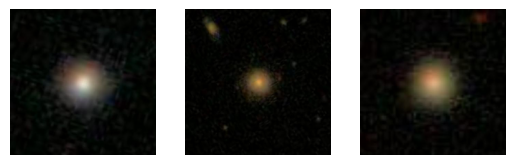

In [ ]:
# elliptical class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'elliptical'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'elliptical', file) , target_size=(256, 256))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

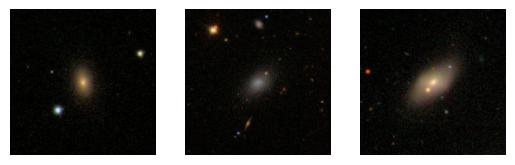

In [ ]:
# lenticular class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'lenticular'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'lenticular', file) , target_size=(256, 256))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

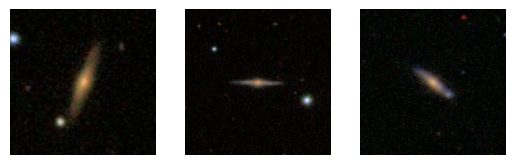

In [ ]:
# spiral class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'spiral'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'spiral', file) , target_size=(256,256))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

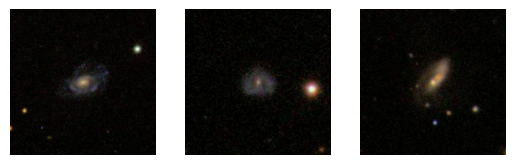

In [ ]:
# irregular class
for num, file in enumerate(os.listdir(os.path.join(my_data, 'train', 'irregular'))[0:3]):
    img = image.load_img(os.path.join(my_data, 'train', 'irregular', file) , target_size=(256,256))
    plt.subplot(1, 3, num+1)
    plt.axis('off')
    plt.imshow(img)

In [ ]:
print('The final dataset is available at:', my_data)

The final dataset is available at: /content/unzipped/data


#Multiclass#

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os, time
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
train_dataset_path = '/content/unzipped/data/train'
validation_dataset_path = '/content/unzipped/data/validation'

In [ ]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest',
                                  vertical_flip=True,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 9233 images belonging to 4 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 3960 images belonging to 4 classes.


In [ ]:

labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : elliptical
1 : irregular
2 : lenticular
3 : spiral


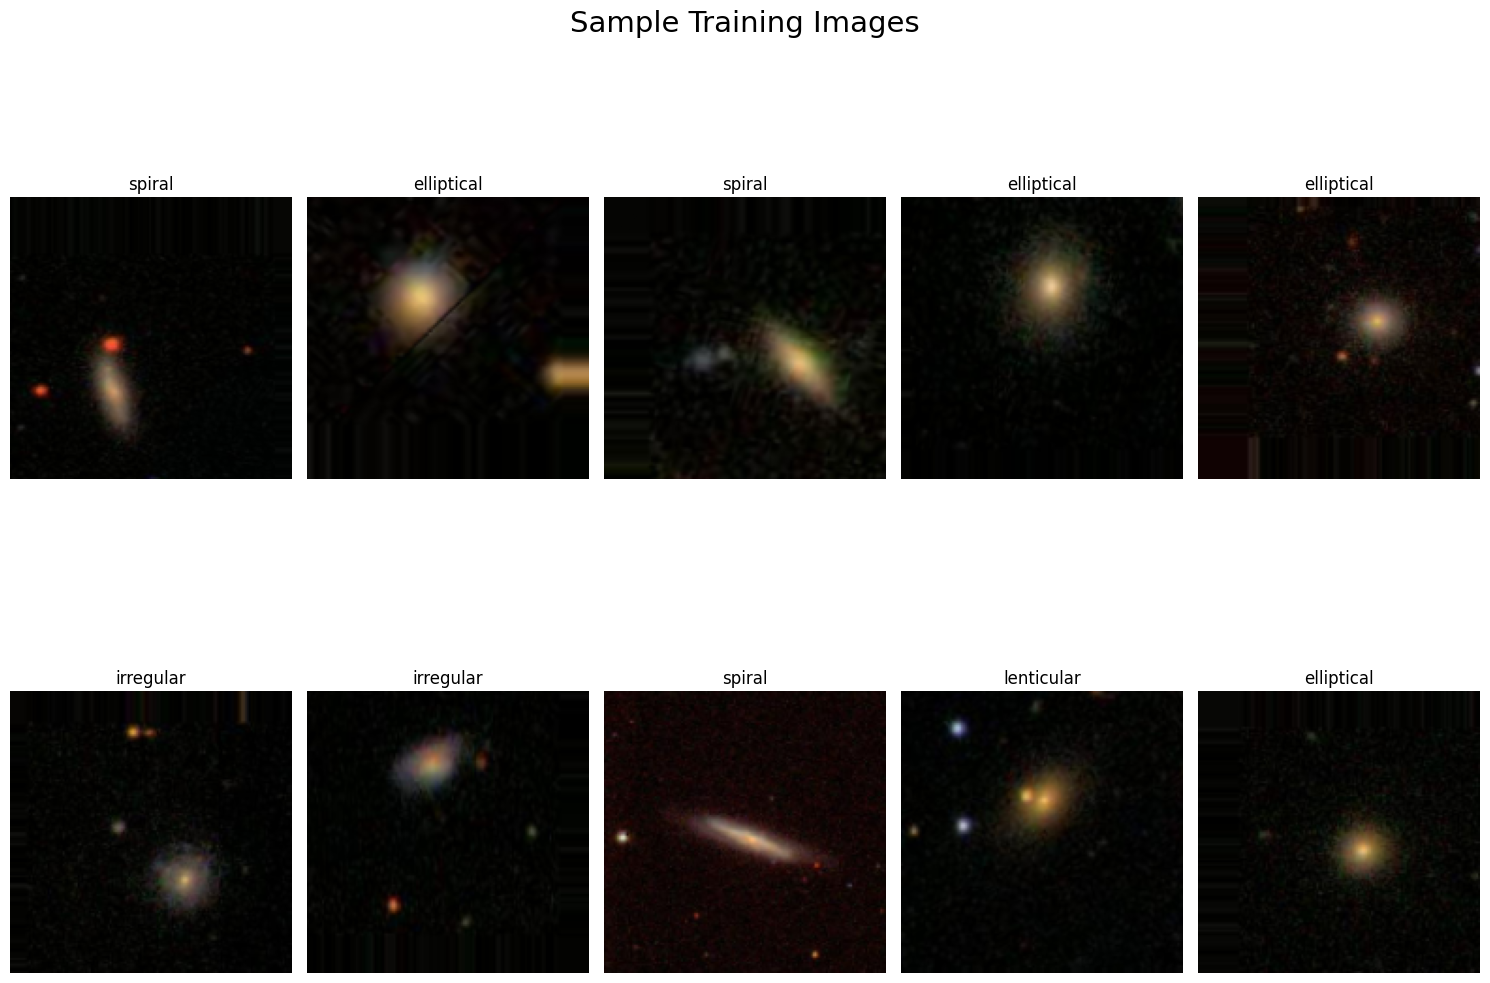

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [ ]:
def create_model():
    model = Sequential([
        Conv2D(filters=512, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=256, kernel_size=(5, 5), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=1024, activation='relu'),
        Dense(units=512, activation='relu'),
        Dropout(0.5),
        Dense(units=4, activation='softmax')
    ])

    return model

    # def create_model():
    # model = Sequential([
    #     Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    #     Activation('relu'),
    #     MaxPooling2D(pool_size=(2, 2)),
    #     BatchNormalization(),

    #     Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    #     Activation('relu'),
    #     MaxPooling2D(pool_size=(2, 2)),
    #     BatchNormalization(),

    #     Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
    #     Activation('relu'),
    #     MaxPooling2D(pool_size=(2, 2)),
    #     BatchNormalization(),

    #     Flatten(),

    #     Dense(units=256, activation='relu'),
    #     Dropout(0.5),
    #     Dense(units=4, activation='softmax')
    # ])

    # return model

In [ ]:
cnn_model = create_model()

In [ ]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 512)     38912     
                                                                 
 activation (Activation)     (None, 146, 146, 512)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 512)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 73, 73, 512)      2048      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 256)       3277056   
                                                                 
 activation_1 (Activation)   (None, 69, 69, 256)       0

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [ ]:
optimizer = Adam(learning_rate=0.001)

In [ ]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
# history = cnn_model.fit(train_generator, epochs=10, validation_data=validation_generator,verbose=2,callbacks=[reduce_lr])                                              #accuracy-max:88.51%

# # history=cnn_model.fit(train_generator,epochs=5,validation_data=validation_generator)     #accuracy-max:71%

In [ ]:
print('------- Training -------')
start = time.time()
history = cnn_model.fit(train_generator, epochs=100, validation_data=validation_generator,verbose=2,callbacks=[reduce_lr])
end = time.time()
print("Total training took {:.2f} hours.".format((end - start)/3600))

------- Training -------
Epoch 1/100
289/289 - 157s - loss: 0.9191 - accuracy: 0.6212 - val_loss: 1.8802 - val_accuracy: 0.2725 - lr: 0.0010 - 157s/epoch - 544ms/step
Epoch 2/100
289/289 - 112s - loss: 0.7309 - accuracy: 0.7166 - val_loss: 0.8656 - val_accuracy: 0.6641 - lr: 0.0010 - 112s/epoch - 389ms/step
Epoch 3/100
289/289 - 115s - loss: 0.6653 - accuracy: 0.7505 - val_loss: 1.1347 - val_accuracy: 0.5891 - lr: 0.0010 - 115s/epoch - 396ms/step
Epoch 4/100
289/289 - 113s - loss: 0.6041 - accuracy: 0.7896 - val_loss: 0.6178 - val_accuracy: 0.7470 - lr: 0.0010 - 113s/epoch - 392ms/step
Epoch 5/100
289/289 - 114s - loss: 0.5702 - accuracy: 0.8095 - val_loss: 0.5989 - val_accuracy: 0.7664 - lr: 0.0010 - 114s/epoch - 395ms/step
Epoch 6/100
289/289 - 112s - loss: 0.5196 - accuracy: 0.8239 - val_loss: 0.3856 - val_accuracy: 0.8712 - lr: 0.0010 - 112s/epoch - 389ms/step
Epoch 7/100
289/289 - 115s - loss: 0.4883 - accuracy: 0.8436 - val_loss: 0.4604 - val_accuracy: 0.8442 - lr: 0.0010 - 115s/

In [ ]:
max(history.history['val_accuracy'])

0.9444444179534912

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

In [ ]:
#Model saved
cnn_model.save('final_galaxy.h5')

In [ ]:
#loading model
cnn_model.load_weights('final_galaxy.h5')

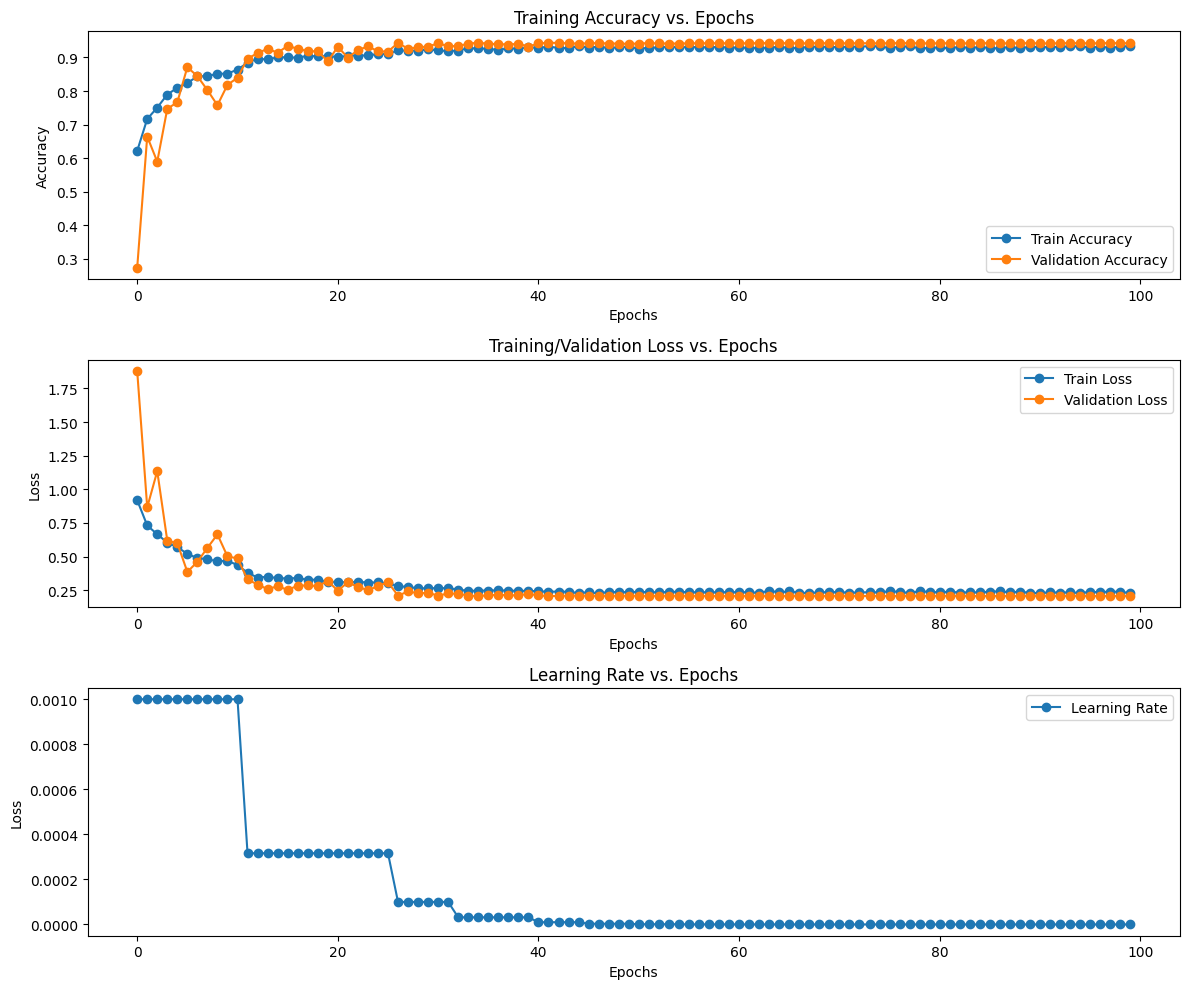

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
#test data accuracy
test_dataset = '/content/unzipped/data/validation'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 3960 images belonging to 4 classes.


In [ ]:
predictions = cnn_model.predict(test_generator)

124/124 [==============================] - 15s 119ms/step


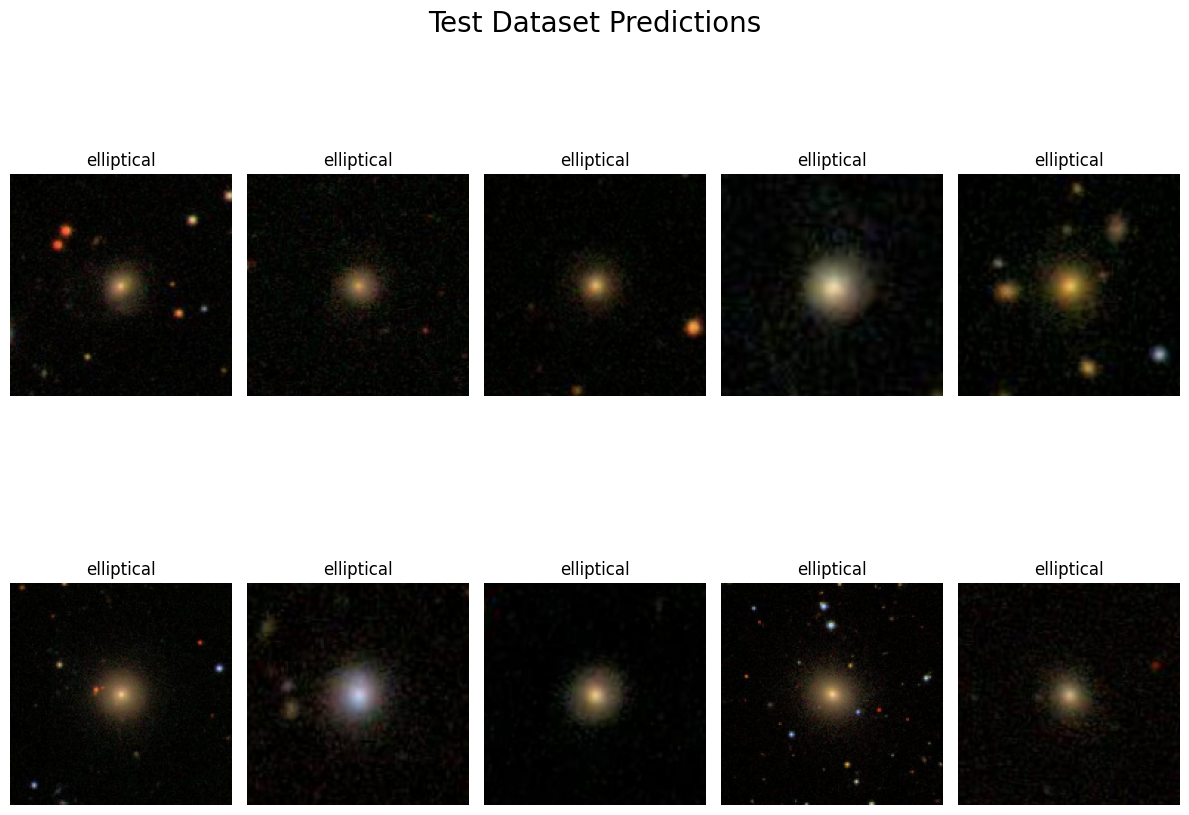

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

124/124 [==============================] - 15s 120ms/step - loss: 0.2062 - accuracy: 0.9427


In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.20624785125255585
Test Accuracy: 0.9426767826080322


In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

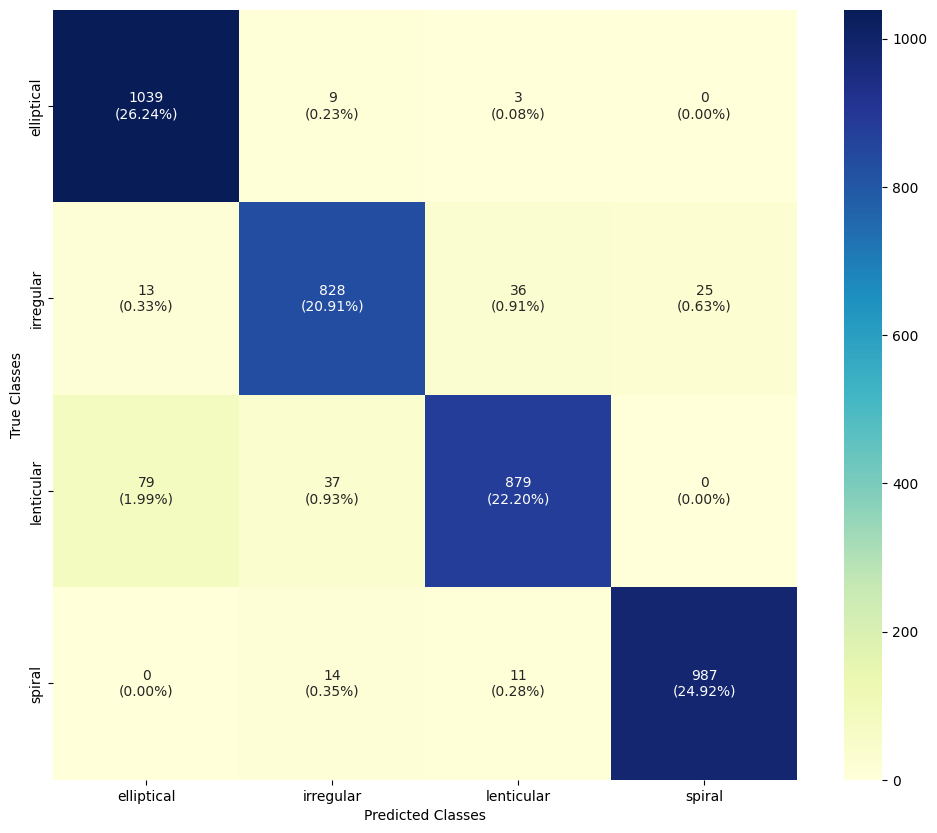

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(4,4)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

  elliptical       0.92      0.99      0.95      1051
   irregular       0.93      0.92      0.93       902
  lenticular       0.95      0.88      0.91       995
      spiral       0.98      0.98      0.98      1012

    accuracy                           0.94      3960
   macro avg       0.94      0.94      0.94      3960
weighted avg       0.94      0.94      0.94      3960



In [ ]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [ ]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

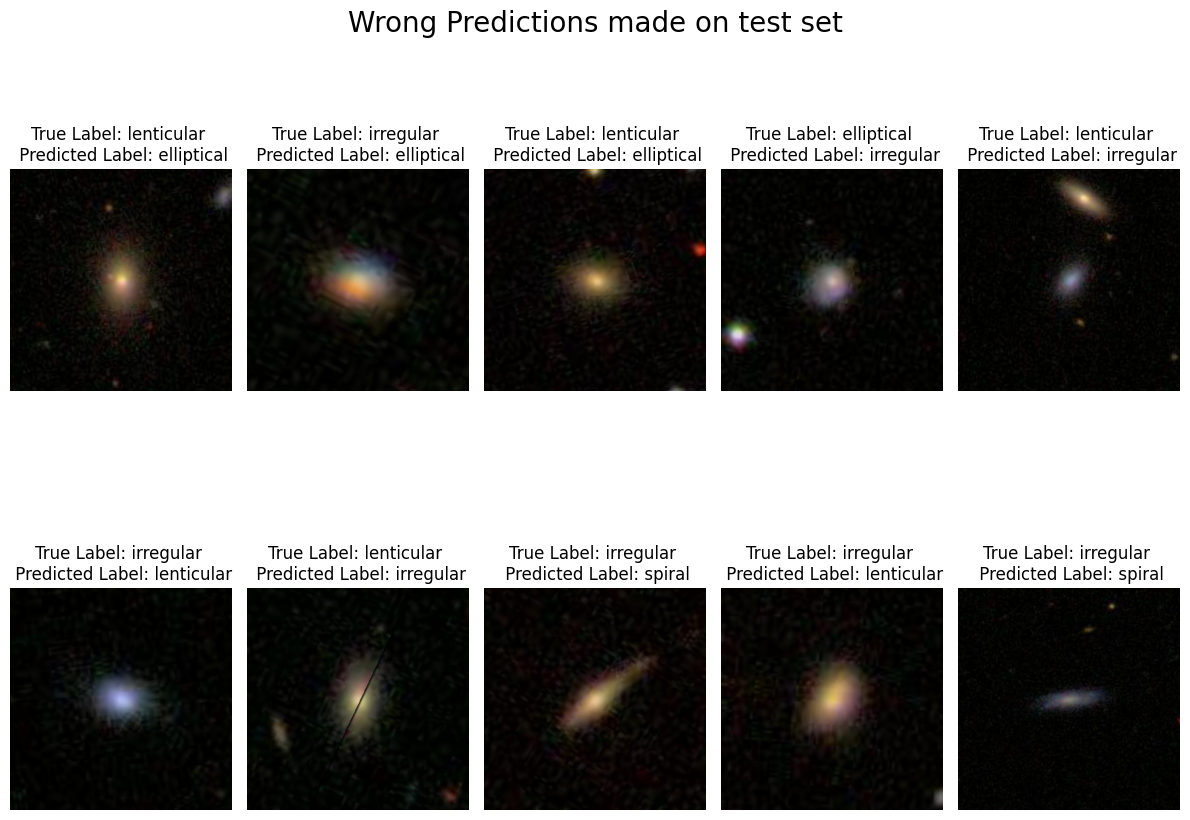

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

In [ ]:
#Classification
import cv2
path='/content/irregular5.jpg'
test_img=cv2.imread(path)

In [ ]:
# import matplotlib.image as mpimg
# from matplotlib.pyplot import imshow
# #%matplotlib inline
# test_img = mpimg.imread('/content/lenticular_gal4.jpg')
# #figure()
# imshow(test_img)

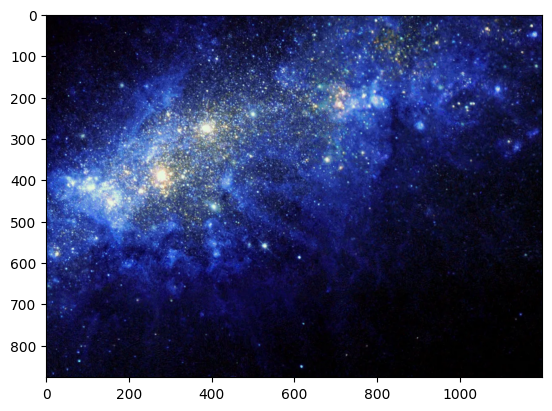

In [ ]:
plt.imshow(test_img)
#cv2_imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(150,150))

In [ ]:
test_input = test_img.reshape((1,150,150,3))

In [ ]:
cnn_model.predict(test_input)

1/1 [==============================] - 1s 569ms/step


array([[0., 0., 0., 1.]], dtype=float32)

In [ ]:
# 0 : elliptical
# 1 : irregular
# 2 : lenticular
# 3 : spiral